<a href="https://colab.research.google.com/github/rohitmaggu/Deep-Learning-Notebooks/blob/master/FASH_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

#   Train a ConvNet on the MNIST fashion data.  This data consists of 10 classes of fashion images such
#   as shorts, dresses, shoes, purses, etc.  These images replace the handwritten digits in the classic MNIST dataset.
#   This change makes it harder to get a high score and more closely reflects real world usage of image 
#   classification.  And at the same time, is still small enough for the average PC to train in a short time.
# See https://github.com/zalandoresearch/fashion-mnist for information and code on Fashion MNIST

# This code is based on MNIST example found at Keras.io

from __future__ import print_function
import keras
from keras.datasets import fashion_mnist  # new with Keras 2.1.2.  Yah!!
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


Using TensorFlow backend.


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [0]:
 #  Supress warning and informational messages
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# Number of classes - do not change unless the data changes


# sizes of batch and # of epochs of data
batch_size = 128
epochs = 24

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [0]:
#   Deal with format issues between different backends.  Some put the # of channels in the image before the width and height of image.
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = X_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [0]:
#   Type convert and scale the test and training data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [0]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print(y_train[:4])

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
[9 0 0 3]


In [0]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

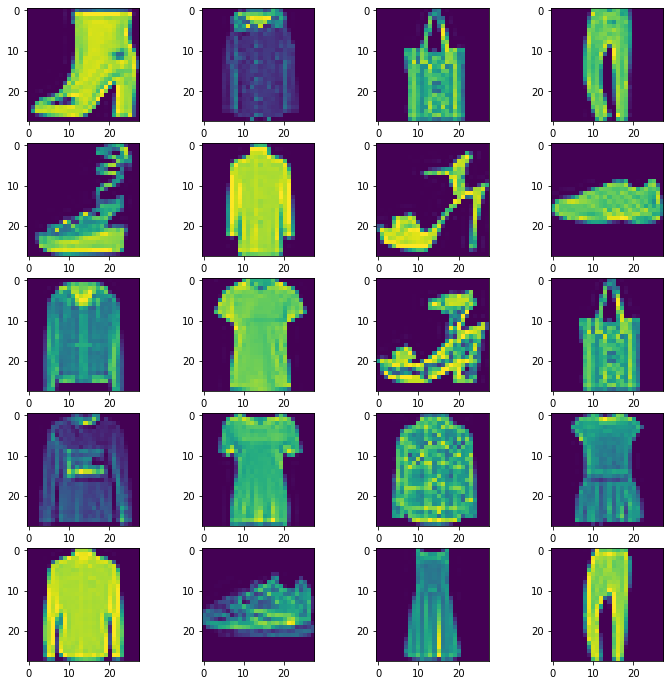

In [0]:
# dataset visualization
w=10
h=10
fig=plt.figure(figsize=(12, 12))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = np.random.randint(100)
    fig.add_subplot(rows, columns, i)
    plt.imshow(x_train[img][: ,: ,0])
plt.show()

#plt.imshow(x_train[1][: ,: ,0])

In [0]:
# convert class vectors to binary class matrices.  One-hot encoding
#  3 => 0 0 0 1 0 0 0 0 0 0 and 1 => 0 1 0 0 0 0 0 0 0 0 
num_classes=10
y_train = keras.utils.to_categorical(y_train,num_classes )
y_test = keras.utils.to_categorical(y_test,num_classes)

In [0]:
display(y_train)


array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
# set up the layers
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=input_shape))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))









Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
#   define compile to minimize categorical loss, use ada delta optimized, and optimize to maximizing accuracy
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [0]:
# fitting the model
hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/24





60000/60000 [==============================] - 16s 270us/step - loss: 0.6814 - acc: 0.7495 - val_loss: 0.4772 - val_acc: 0.8210
Epoch 2/24
60000/60000 [==============================] - 2s 42us/step - loss: 0.4283 - acc: 0.8475 - val_loss: 0.3791 - val_acc: 0.8585
Epoch 3/24
60000/60000 [==============================] - 3s 43us/step - loss: 0.3712 - acc: 0.8669 - val_loss: 0.3430 - val_acc: 0.8756
Epoch 4/24
60000/60000 [==============================] - 2s 40us/step - loss: 0.3438 - acc: 0.8776 - val_loss: 0.3368 - val_acc: 0.8749
Epoch 5/24
60000/60000 [==============================] - 2s 41us/step - loss: 0.3192 - acc: 0.8855 - val_loss: 0.3038 - val_acc: 0.8907
Epoch 6/24
60000/60000 [==============================] - 2s 40us/step - loss: 0.3032 - acc: 0.8915 - val_loss: 0.2952 - val_acc: 0.8910
Epoch 7/24
60000/60000 [

In [0]:
# inferencing results from trained model
val_accuracy = hist.history['val_acc']
accuracy = hist.history['acc']
val_loss = hist.history['loss']

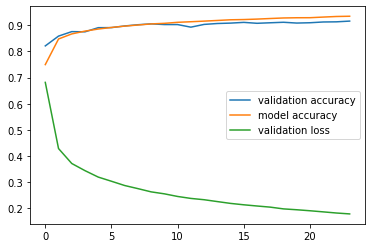

In [0]:

#  plotting the infered results
plt.plot(val_accuracy , label  = 'validation accuracy')
plt.plot(accur4.8 Analyzing Fitted Modelacy , label = 'model accuracy')
plt.plot(val_loss , label = 'validation loss')
plt.legend()
plt.show()


In [0]:
# model evaluation
score = model.evaluate(x_test, y_test, verbose=0)

In [0]:
print('accuracy: ',score[1])
print('loss: ',score[0])

accuracy:  0.9159
loss:  0.25804112774729726


# Model Prediction

In [0]:
test = x_test[0]

In [0]:
test = test.reshape(1,28 ,28,1)

In [0]:
test.shape

(1, 28, 28, 1)

In [0]:
model.predict(test).argmax()

9

In [0]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)